In [1]:
import pandas as pd
import utils as my

## Dataset

In [2]:
dataset = pd.read_csv("./pima_diabetes.csv")
target_name = "Outcome"

print(">> Data shape:", dataset.shape)
dataset.head(10)

>> Data shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Missing values and duplicates

In [4]:
print(">> Missing values:", dataset.isnull().any().sum())
print(">> Duplicate values:", dataset.duplicated().sum())

# dataset.drop_duplicates(inplace=True, keep='first', ignore_index=True)
# print(">> Duplicate values:", dataset.duplicated().sum())

>> Missing values: 0
>> Duplicate values: 0


### Unique values

In [5]:
n_data = dataset.shape[0]

print(">> n_unique = 1:       ", len(my.get_nunique_features(dataset, value=1)))
print(">> n_unique = n_data:  ", len(my.get_nunique_features(dataset, value=n_data)))
print(">> n_unique > n_data-5:", len(my.get_nunique_features(dataset, value=n_data-5, kind='greater_than')))
print(">> n_unique < 3        ", len(my.get_nunique_features(dataset, value=2, kind='less_than')))

>> n_unique = 1:        0
>> n_unique = n_data:   0
>> n_unique > n_data-5: 0
>> n_unique < 3         0


## Data types

### Ignore features

In [6]:
dataset = pd.read_csv("./pima_diabetes.csv")
print(">> Initial:\n", dataset.dtypes.value_counts())

ignore_features = []
ignore_features += my.get_nunique_features(dataset, value=1)
ignore_features += my.get_nunique_features(dataset, value=dataset.shape[0])
ignore_features = list(set(ignore_features))

if target_name in ignore_features:
    ignore_features.remove(target_name)

print(ignore_features)
# dataset.drop(ignore_features, axis=1, inplace=True)
print(">> After dropping features:\n", dataset.dtypes.value_counts())

>> Initial:
 int64      7
float64    2
dtype: int64
[]
>> After dropping features:
 int64      7
float64    2
dtype: int64


### Numerical features

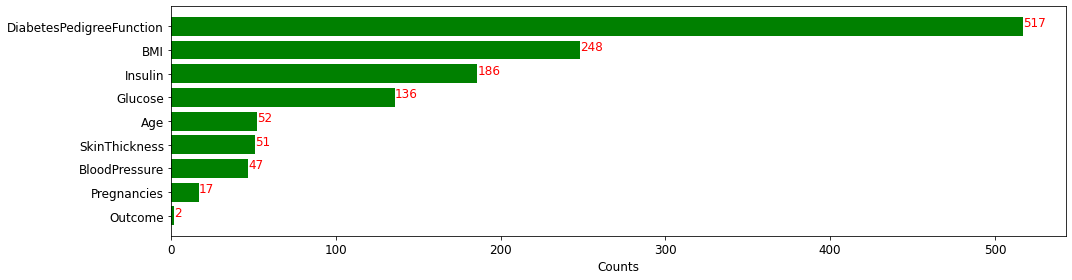

In [7]:
numerical_features = dataset.select_dtypes(include='number').columns.values
my.show_counts(dataset, numerical_features)

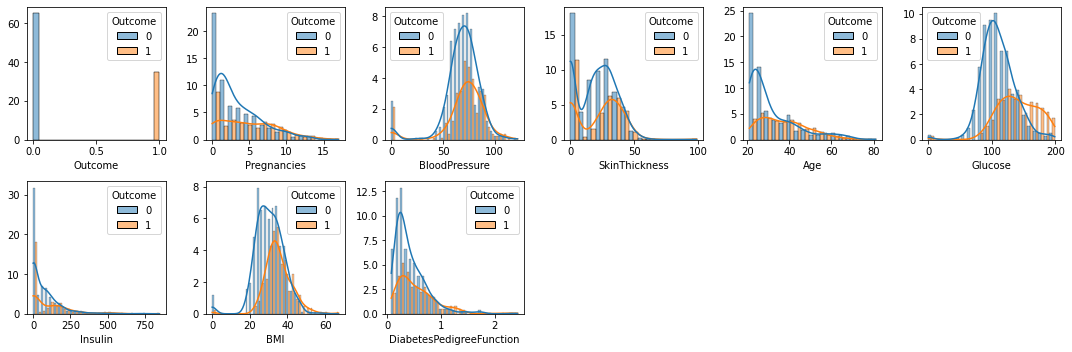

In [8]:
feature_names = my.get_nunique_features(dataset[numerical_features], value=1, kind="greater_than")
my.show_histogram(dataset, feature_names, target=target_name, kde=True)

In [ ]:
## Top 10%
# feature_names = my.get_nunique_features(dataset[numerical_features], value=n_data*0.9, kind="greater_than")
# my.show_histogram(dataset, feature_names, target=None, kde=True)

In [ ]:
## Bottom 10%
# feature_names = my.get_nunique_features(dataset[numerical_features], value=n_data*0.1, kind="less_than")
# my.show_histogram(dataset, feature_names, target=None, kde=True)

### Categorical features

In [9]:
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.values
print(categorical_features)
# my.show_counts(dataset, categorical_features, color='blue')

[]


In [ ]:
# feature_names = my.get_nunique_features(dataset[categorical_features], value=1, kind="greater_than")
# my.show_histogram(dataset, feature_names, target=target_name, xlabels=False)

### Ordinal features

In [ ]:
ordinal_features = None
# my.show_histogram(dataset, ordinal_features, target=target_name)

### High cardinality features

In [ ]:
high_cardianlity_features = None
# my.show_histogram(dataset, high_cardianlity_features, target=target_name)

### Group features

In [ ]:
group_features = None
# my.show_histogram(dataset, group_features, target=target_name)

### Bin number features

In [ ]:
group_features = None
# my.show_histogram(dataset, group_features, target=target_name)

## Correlations between features

### Numerical Features - Peason's R

In [12]:
numerical_features = dataset.select_dtypes(include='number').columns.values
high_corr_features, (names, values) = my.get_high_corr_numerical(
                                        dataset, numerical_features, threshold=0.3)
high_corr_features

Pearson's R = 0.5443 - ['Pregnancies' 'Age']
Pearson's R = 0.4666 - ['Glucose' 'Outcome']
Pearson's R = 0.4368 - ['SkinThickness' 'Insulin']
Pearson's R = 0.3926 - ['SkinThickness' 'BMI']
Pearson's R = 0.3314 - ['Glucose' 'Insulin']


['Glucose', 'Pregnancies', 'SkinThickness']

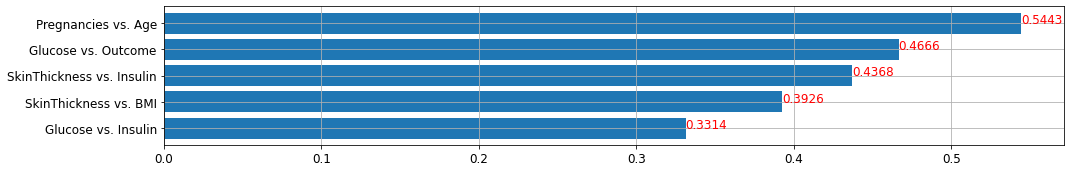

In [13]:
my.show_correlations(names, values, threshold=0.3)

### Categorical features - Cramer's V

In [ ]:
# categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.values
# dataset_encoded = pd.get_dummies(dataset[categorical_features])
# categorical_features = dataset_encoded.columns.values

# high_corr_features, (names, values) = my.get_high_corr_categorical(
#                                             dataset_encoded, categorical_features, threshold=0.8)

In [ ]:
# my.show_correlations(names, values, threshold=0.5)